### We managed to get the data to run. Let's see if the pipeline works

In [1]:
import sys
sys.path.insert(1, "../../")
from src.combine import combine_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-poster')

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

In [23]:
df = pd.read_feather("../../data/combined_all_features/combined_1605723212.feather")

In [24]:
df.shape

(4095758, 106)

<AxesSubplot:>

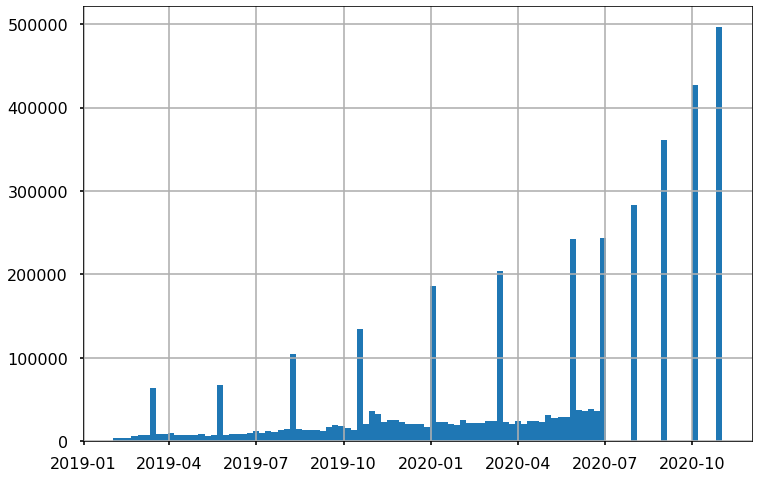

In [25]:
fig = plt.figure(figsize=(12,8))
df.sample_date.hist(bins=100)

Somehow dynamic samplying stopped in Jan 2020. Lets dig in.

In [26]:
df_dynamic = pd.read_feather("../../data-transactional/labeled/labeled_1605688467.feather")
df_static = pd.read_feather("../../data/labeled/labeled_1605689038.feather")

<AxesSubplot:>

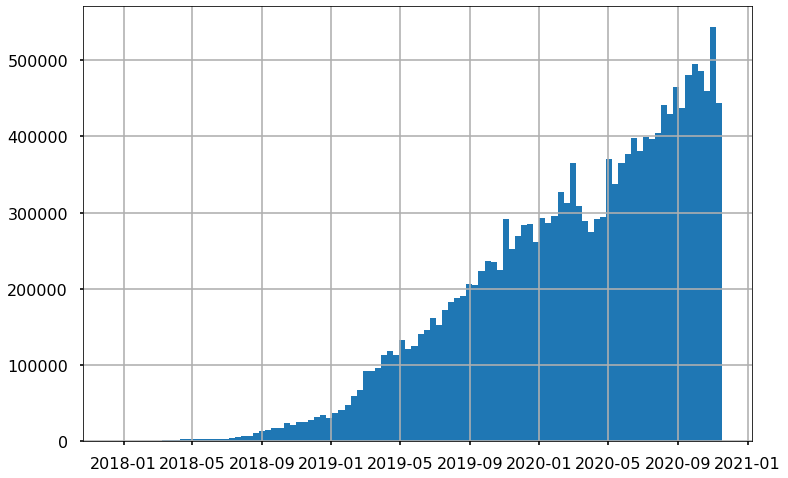

In [27]:
fig = plt.figure(figsize=(12,8))
df_dynamic.transaction_datetime.hist(bins=100)

<AxesSubplot:>

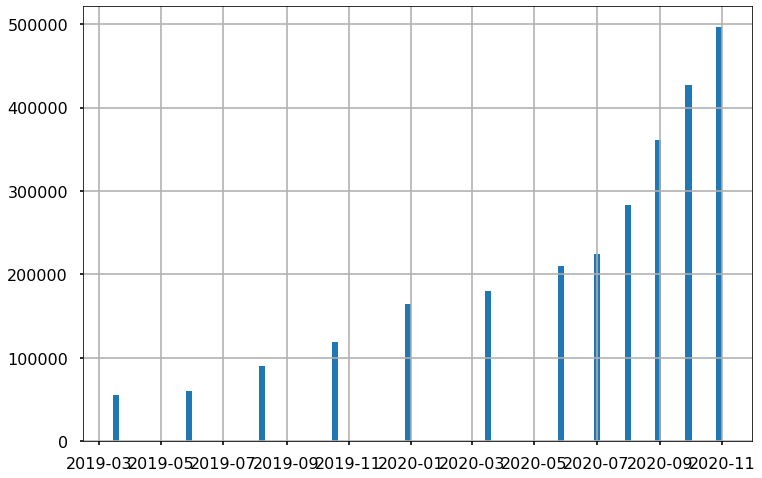

In [28]:
fig = plt.figure(figsize=(12,8))
df_static.sample_date.hist(bins=100)

In [35]:
from src.combine import combine_data
from train import preprocess

In [39]:
df.business_account_number.nunique()

536624

In [36]:
df = preprocess(df)

In [31]:
import pickle as pkl

model_path = "../../models/customer_risk_target_no_giact_time_since_last_link.pkl"
model = pkl.load(open(model_path, "rb"))

In [40]:
df[model.feature_name_].head()

,first_deposit_amount,vantage_score,bcc7120,email_risk_score,fraud_score_2,name_email_correlation,transaction_as_pct_of_balance,mean_account_balance_30d,phone_risk_score,name_address_correlation,...,nr_trans_ratio,iqt9413,dollar_val_returns_3d,nr_returns_30d,credit_card_loan_amount,fraud_score_1,age_money_account,transaction_code_encoded,all7120_default_encoded,bcc7120_default_encoded
0,500.0,784.0,0.0,0.2500,0.326,0.9937,-0.130131,637.976429,0.281,0.9096,...,0.214286,0.0,0.0,0.0,0.0,0.0301,26,1,-1.0,-1.0
1,50.0,676.0,95.0,0.0480,0.675,0.5626,1.774618,325.853125,0.253,0.9990,...,0.125000,0.0,0.0,0.0,23149.0,0.1383,23,4,-1.0,-1.0
2,100.0,751.0,26.0,0.0630,0.683,0.9959,0.000964,6294.837800,0.121,0.9096,...,0.054054,0.0,0.0,0.0,1165.0,0.1349,53,0,-1.0,-1.0
3,25.0,568.0,97.0,0.0237,NaN,0.9987,0.872093,347.616800,0.000,0.9662,...,0.136364,0.0,0.0,0.0,9776.0,0.1040,73,7,-1.0,-1.0
4,20000.0,795.0,1.0,0.0083,NaN,0.9999,0.000279,13995.486111,0.000,0.9916,...,0.187500,0.0,0.0,0.0,232.0,0.0239,348,7,-1.0,-1.0
